Prediction with the Breast Cancer dataset using Naive Bayes

Import the following Libraries

DataSets
Naive Bayes
sklearn.naive_bayes.GaussianNB(*, priors=None, var_smoothing=1e-09)
Measure Classifier - Confusion Matrix
Split the data into Training and Test set
Program Structure

Import libraries
Select the dataset
Preprocessing - Normalization - Cleaning
We can visualize the data a bit (Data Exploration)
Split the data for training and test (70%/30% or 80%/20%)
Make the prediction with the selected classifier
sklearn.naive_bayes.GaussianNB(*, priors=None, var_smoothing=1e-09)

priors: array-like of shape (n_classes,) Prior probabilities of the classes. If specified, the priors are not adjusted according to the data.

var_smoothing: float, default = 1e-9 A portion of the largest variance of all features that is added to the variances for stability of computation.



In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [3]:
#We load de breast cancer dataset
dataset = datasets.load_breast_cancer()

In [4]:
#Verify the info contained in the dataset
print('Info in dataset:')
print(dataset.keys())
print()

Info in dataset:
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])



In [5]:
#Verify Dataset characteristics
print('Dataset characteristics:')
print(dataset.DESCR)

Dataset characteristics:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For insta

In [6]:
#Select all the columns
X = dataset.data

#define the data corresponding to the labels 
y = dataset.target

In [7]:
#Verify the dataset characteristics
print(dataset.data)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [8]:
print(dataset.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [11]:
#split the 'train' data into training and testing to test the algorithms." 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


algorithm = GaussianNB()

#train the model
algorithm.fit(X_train, y_train)

#Do the prediction
y_pred = algorithm.predict(X_test)

Matriz de Confusión:
[[29  6]
 [ 0 79]]


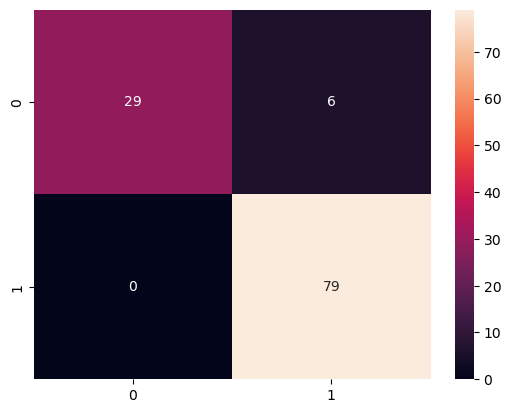

In [12]:
#Verify the confusion matrix. The confusion matrix compares the prediction(y_pred) with the actual values(y_test)


import seaborn as sn
import matplotlib.pyplot as plt

matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(matrix)

sn.heatmap(matrix, annot=True)
plt.show()

# We have 3 false negatives and 7 false positives. Total sample size 114 (41+7+3+63)"The first row ([29 6]) represents the predictions for the first class.
"""The second row ([ 0 79]) represents the predictions for the second class.
Specifically:

The first number in the first row (29) is the number of true positives (TP): cases that are actually from the first class and the model correctly predicted.
The second number in the first row (6) is the number of false positives (FP): cases that are actually from the second class but the model incorrectly predicted as belonging to the first class.
The first number in the second row (0) is the number of false negatives (FN): cases that are actually from the first class but the model incorrectly predicted as belonging to the second class.
The second number in the second row (79) is the number of true negatives (TN): cases that are actually from the second class and the model correctly predicted."
"""

In [13]:
from sklearn.metrics import accuracy_score
# Accuracy measures the percentage of cases that que model has been right about. 
accuracy_score(y_test, y_pred)

0.9473684210526315

In [14]:
# Precision - The precision metric allows us to measure the quality of the machine learning model in classification tasks.
#It answers the question: What percentage of what is identified as positive is actually correct?"
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='micro')

0.9473684210526315

In [15]:
#The combined performance of accuracy and sensitivity.
from sklearn.metrics import f1_score 
f1_score(y_test, y_pred, average='micro')

0.9473684210526315

In [16]:
#Recall or Sensitivity - What percentage of positive values were correctly identified?"
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='micro')

0.9473684210526315